#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().sum()

3

In [4]:
df.drop_duplicates(keep = 'first', inplace = True )

In [5]:
df.duplicated().sum()

0

Periksa apakah ada missing values

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Periksa outlier dengan boxplot untuk setiap kolom feature

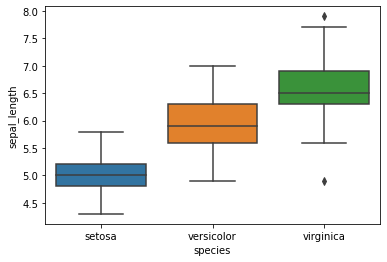

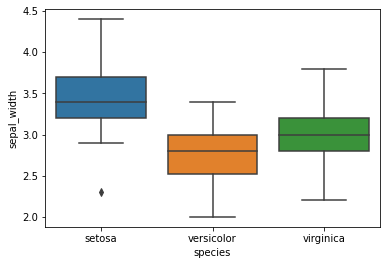

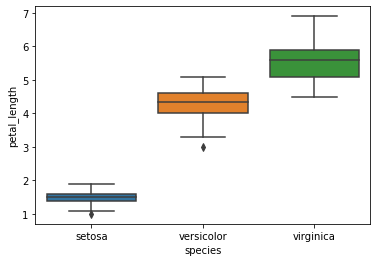

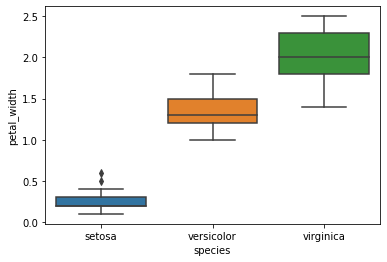

In [7]:
sns.boxplot(x = df["species"], y = df["sepal_length"], data=pd.melt(df))
plt.show()
sns.boxplot(x = df["species"], y = df["sepal_width"], data=pd.melt(df))
plt.show()
sns.boxplot(x = df["species"], y = df["petal_length"], data=pd.melt(df))
plt.show()
sns.boxplot(x = df["species"], y = df["petal_width"], data=pd.melt(df))
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [8]:
x = df.iloc[:,:-1]
y =  df.iloc[:,4]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [11]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [12]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa']


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [0 4 0]
 [0 2 5]]
Accuracy Score:  0.8666666666666667


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [14]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, y_train)

Uji hasil model dengan data test

In [15]:
y_pred = nbtrain.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [16]:
cm2 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [0 4 0]
 [0 2 5]]
Accuracy Score:  0.8666666666666667


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Uji model dengan data test

In [18]:
y_pred = knn.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [19]:
cm3 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix\n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [0 4 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [21]:
print("Pada hasil pengujian kali ini, KNN memiliki tingkat akurasi tertinggi dibandingkan dengan Logistic Regression dan Naive Bayes")
print("\nKNN: 0.9333333333333333\nLogistic Regression: 0.8666666666666667\nNaive Bayes = 0.8666666666666667")

Pada hasil pengujian kali ini, KNN memiliki tingkat akurasi tertinggi dibandingkan dengan Logistic Regression dan Naive Bayes

KNN: 0.9333333333333333
Logistic Regression: 0.8666666666666667
Naive Bayes = 0.8666666666666667
